In [193]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import pingouin as pg
pd.set_option('display.float_format', lambda x: '%.5f' % x)



## Exercise 1a)

In [194]:
data = pd.read_csv("../data/it_salary_2020.csv",delimiter=";")
data.sample(10)

#data["Yearly brutto salary (without bonus and stocks) in EUR"].describe()


,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
1117,07.12.2020 23:01,30.00000,Male,Munich,DevOps,10.00000,3,Lead,NaN,"Python, Go, AWS, Kubernetes, Docker",...,NaN,28.00000,Full-time employee,Unlimited contract,English,1000+,Product,No,0.00000,0.00000
546,25.11.2020 11:42,27.00000,Male,Berlin,DevOps,7.00000,35,Senior,Go,"Python, PHP, AWS, Google Cloud, Kubernetes, Do...",...,NaN,26.00000,Full-time employee,Unlimited contract,English,101-1000,Startup,No,20.00000,NaN
691,25.11.2020 20:15,33.00000,Male,Berlin,Backend Developer,9.00000,4,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,NaN,NaN,Full-time employee,Unlimited contract,English,1000+,Startup,No,NaN,NaN
958,30.11.2020 13:26,24.00000,Male,Berlin,Backend Developer,1.00000,1,Junior,Python,"Python, Javascript / Typescript, R",...,NaN,24.00000,Praktikant,Temporary contract,German,up to 10,Startup,No,0.00000,NaN
726,26.11.2020 05:53,22.00000,Diverse,Cologne,QA Engineer,1.00000,1,Head,Cobol,Perl,...,23000.00000,45.00000,Full-time employee,Unlimited contract,German,1000+,Product,No,30.00000,2000.00000
226,24.11.2020 13:40,25.00000,Male,Stuttgart,Backend Developer,4.00000,2,Middle,Java,"Javascript / Typescript, .NET",...,NaN,30.00000,Full-time employee,Unlimited contract,German,101-1000,Consulting / Agency,No,NaN,NaN
467,25.11.2020 00:01,31.00000,Female,Berlin,IT Lead,NaN,1,Senior,NaN,NaN,...,NaN,20.00000,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,NaN
108,24.11.2020 11:55,37.00000,Male,Munich,Software Engineer,15.00000,2,Senior,php,"PHP, Javascript / Typescript, SQL, Docker",...,NaN,30.00000,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,200.00000
1100,06.12.2020 21:08,35.00000,Male,Berlin,Backend Developer,13.00000,5,Senior,Php,"PHP, SQL, Go, AWS, Docker",...,0.00000,26.00000,Full-time employee,Unlimited contract,English,1000+,Product,No,20.00000,NaN
74,24.11.2020 11:42,31.00000,Male,Berlin,IT Lead,11.00000,6,Lead,Java,"Python, Java / Scala, SQL, Go, AWS, Google Clo...",...,NaN,27.00000,Full-time employee,Unlimited contract,English,101-1000,Startup,No,40.00000,200.00000


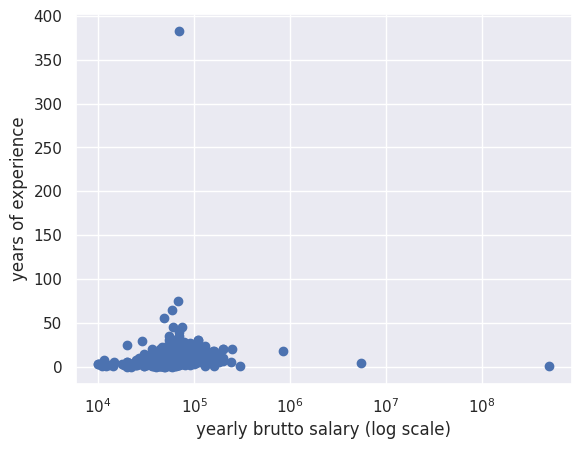

In [195]:
fig, ax = plt.subplots()
ax.scatter( data["Yearly brutto salary (without bonus and stocks) in EUR"],data["Total years of experience"])
ax.set_ylabel("years of experience" )
ax.set_xlabel("yearly brutto salary (log scale)")
ax.set_xscale("log")
plt.show()

Clearly, we need to remove outliers before checking for covariance:

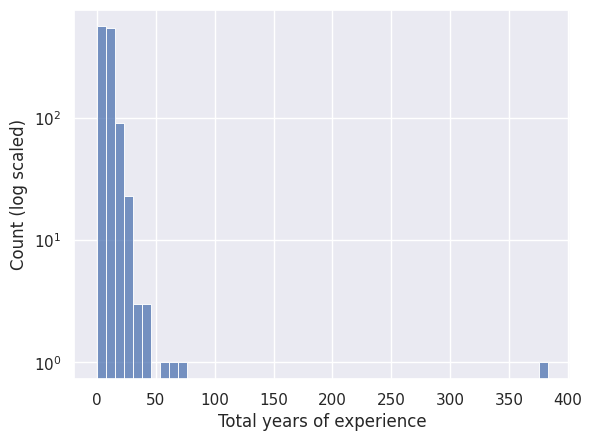

In [196]:
fig, ax = plt.subplots()
sns.histplot(data["Total years of experience"],bins=50,ax=ax)
ax.set_yscale("log")
ax.set_ylabel("Count (log scaled)") # for better visibility of outliers
plt.show()

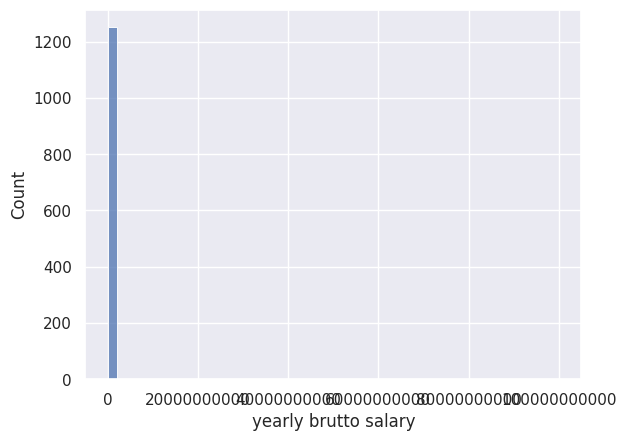

In [197]:
fig, ax = plt.subplots()
sns.histplot(data["Yearly brutto salary (without bonus and stocks) in EUR"],bins=50,ax=ax)
#ax.set_yscale("log")
ax.set_ylabel("Count")
ax.set_xlabel("yearly brutto salary")
ax.ticklabel_format(style="plain", axis='x')
plt.show()

Since both dataframes are **not** a normal distribution, we are going to use *IQR* to detect outliers and remove them:

In [198]:
def filter_iqr(my_data, multiplier = 1.5): #filters out any data outside the IQR
    q1 = my_data.quantile(0.25)
    q3 = my_data.quantile(0.75)
    iqr = q3 -q1
    mask = (my_data < (q1 - multiplier *iqr)) | (my_data > (q3 + multiplier *iqr)) # ~ inverts mask so we get everything inside the IQR
    df = my_data.mask(mask) # replace false masked values with nan
    df.dropna()
    return df

data["Total years of experience"] = filter_iqr(data["Total years of experience"])
data["Yearly brutto salary (without bonus and stocks) in EUR"] = filter_iqr(data["Yearly brutto salary (without bonus and stocks) in EUR"])


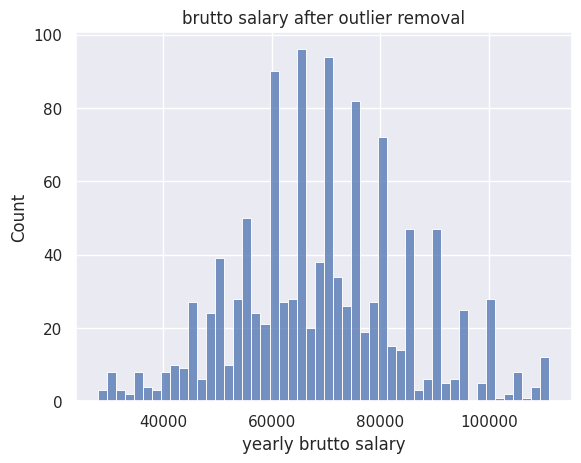

In [199]:
fig, ax = plt.subplots()
sns.histplot(data["Yearly brutto salary (without bonus and stocks) in EUR"],bins=50,ax=ax)
#ax.set_yscale("log")
ax.set_ylabel("Count")
ax.set_xlabel("yearly brutto salary")
ax.set_title("brutto salary after outlier removal")
ax.ticklabel_format(style="plain", axis='x')
plt.show()

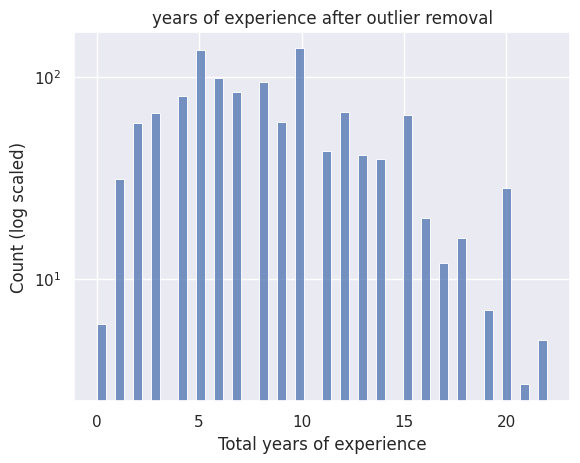

In [200]:
fig, ax = plt.subplots()
sns.histplot(data["Total years of experience"],bins=50,ax=ax)
ax.set_yscale("log")
ax.set_ylabel("Count (log scaled)") # for better visibility of outliers
ax.set_title("years of experience after outlier removal")
plt.show()

Finally, we can check the covariance matrix between *total years of experience* and *Yearly brutto salary*:

In [201]:
data["Yearly brutto salary (without bonus and stocks) in EUR"].cov(data["Total years of experience"])

29924.702346438124

since the result is positive, the two columns co-vary.

In [202]:
new_df = data[["Total years of experience","Years of experience in Germany", "Yearly brutto salary (without bonus and stocks) in EUR","Number of vacation days"]].dropna(how="any",axis=0)

new_df["Years of experience in Germany"] =new_df["Years of experience in Germany"].apply(lambda x: str(x.replace(",","."))).astype(float)
#new_df.describe()
new_df["Years of experience in Germany"] = filter_iqr(new_df["Years of experience in Germany"])
new_df["Number of vacation days"] = filter_iqr(new_df["Number of vacation days"])
new_df.describe()

,Total years of experience,Years of experience in Germany,Yearly brutto salary (without bonus and stocks) in EUR,Number of vacation days
count,1040.00000,942.00000,1040.00000,995.00000
mean,8.50288,3.11837,69234.10769,28.28040
std,4.55656,2.11920,15359.64201,2.00572
min,0.00000,0.00000,29000.00000,23.00000
25%,5.00000,1.00000,60000.00000,27.00000
50%,8.00000,3.00000,69000.00000,28.00000
75%,11.00000,5.00000,80000.00000,30.00000
max,22.00000,9.00000,110000.00000,34.00000


Next we compute the covariance between *years of experience in germany* and *yearly brutto salary*:

In [203]:
new_df["Years of experience in Germany"].cov(new_df["Yearly brutto salary (without bonus and stocks) in EUR"])

9583.573279995308

The value is positive again, therefore they co-vary.

Finally, we compute the covariance matrix for *total years of experience*, *number of vacation days* and *yearly brutto salary*:

In [204]:
new_df.cov()

,Total years of experience,Years of experience in Germany,Yearly brutto salary (without bonus and stocks) in EUR,Number of vacation days
Total years of experience,20.76226,3.02549,30512.50017,0.60807
Years of experience in Germany,3.02549,4.49100,9583.57328,0.66589
Yearly brutto salary (without bonus and stocks) in EUR,30512.50017,9583.57328,235918602.77376,3268.47889
Number of vacation days,0.60807,0.66589,3268.47889,4.02291


In [205]:
## Exercise 1 b)

In [206]:
df_corr = new_df[["Total years of experience", "Yearly brutto salary (without bonus and stocks) in EUR"]]
df_corr.corr(method="pearson")

,Total years of experience,Yearly brutto salary (without bonus and stocks) in EUR
Total years of experience,1.00000,0.43597
Yearly brutto salary (without bonus and stocks) in EUR,0.43597,1.00000


In [207]:
pg.cronbach_alpha(data=df_corr)

(0.0005172056210700493, array([-0.129,  0.115]))

The correlation of 0.4357 means that the two columns are weakly correlated. Cronbach alpha is 0.0005172 with the 95 % confidence interval being -0.129 to 0.115

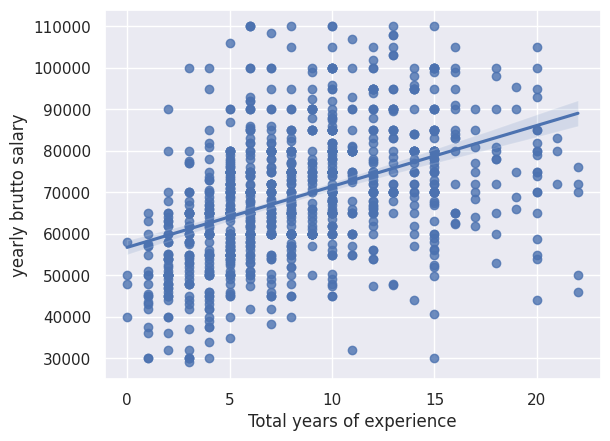

In [208]:
fig, ax = plt.subplots()
sns.regplot(x=df_corr["Total years of experience"],y=df_corr["Yearly brutto salary (without bonus and stocks) in EUR"],scatter=True, fit_reg=True,ax=ax)
ax.set_ylabel("yearly brutto salary")
plt.show()